<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# TAL Labo 1c : Opérations sur une page web en anglais

**Objectif** 

Dans cette troisième partie du Labo1, vous allez refaire une partie des traitements de la partie 1b, mais cette fois-ci sur une page web, spécifiquement une page Wikipedia en anglais (suggestion : "Switzerland").  L'objectif est de réviser les principales commandes apprises, et de traiter le format HTML.

In [75]:
import matplotlib.pyplot as plt
import nltk
import os
from urllib import request
import matplotlib.pyplot
from nltk import word_tokenize
from numpy.core.defchararray import rfind
%matplotlib inline
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\faxiz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**1.** S'inspirer du [chapitre 3 du livre NLTK](http://www.nltk.org/book/ch03.html) pour faire une requête et récupérer le contenu de la page indiquée dans `url2`.  Quelle est la longueur de la chaîne de caractères obtenue ?

In [76]:
url2 = "https://en.wikipedia.org/wiki/Switzerland" 

response = request.urlopen(url2)
html2 = response.read().decode("utf8")
print("raw text len :" + str(len(html2)))

raw text len :1036287


Nous utilserons l'outil `BeautifulSoup` disponible sous forme de module Python pour extraire tout le texte de la page HTML.  Si le code source de la page est stocké dans `html2`, on extrait le texte dans `raw2`.

In [77]:
from bs4 import BeautifulSoup

In [78]:
raw2 = BeautifulSoup(html2).get_text()

**2.** Veuillez réutiliser la méthode du _notebook_ 1b pour enlever le début et la fin de la chaîne `raw2`, car ils contiennent du texte qui n'est pas pertinent pour notre analyse (il ne parle pas de la Suisse).  Quelle est la longueur du résultat ?  Veuillez afficher ses 100 premiers et 100 derniers caractères.

In [80]:
# Regex pour supprimer tout ce qui est entre [], crochet inclus
import re

# Position de début et de fin du texte
startPosition = raw2.find("Switzerland,[d] officially the Swiss Confederation,")
lastSentence = "Merlot is the main variety produced in Ticino."
endPosition = raw2.rfind(lastSentence)

# Clean du text
cleanRaw = raw2[startPosition:endPosition + len(lastSentence)]
cleanRaw = cleanRaw.replace("\n", " ")
cleanRaw = re.sub(r'\[.*?\]', '', cleanRaw)

# Affichage des résultats
print("Longueur du texte nettoyé : " + str(len(cleanRaw)))
print("100 premiers caractères : " + cleanRaw[:100])
print("100 derniers caractères : " + cleanRaw[-100:])

Longueur du texte nettoyé : 88555
100 premiers caractères : Switzerland, officially the Swiss Confederation, is a landlocked country located in west-central Eur
100 derniers caractères :  Chasselas (called Fendant in Valais) and Pinot Noir. Merlot is the main variety produced in Ticino.


**3.** Veuillez effectuer la segmentation en phrases, puis tokeniser chaque phrase.  Veuillez écrire le résultat (une phrase par ligne, espaces entre *tokens*) dans un fichier `sample_web_page.txt` et inspectez-le avec un éditeur de texte.  Observez-vous des imperfections ?

In [86]:
filename = "sample_web_page.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_web_page.txt
if os.path.exists(filename): 
    os.remove(filename)
fd = open(filename, 'a', encoding='utf8')
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
sents = nltk.sent_tokenize(cleanRaw)
for sent in sents:
    words = nltk.word_tokenize(sent)
    fd.write(" ".join(words) + "\n")
fd.close()

PermissionError: [WinError 32] Le processus ne peut pas accéder au fichier car ce fichier est utilisé par un autre processus: 'sample_web_page.txt'

In [ ]:
# Votre appréciation de la qualité ici :
"""
De prime abord, le résultat obtenu nous semble pas trop mal. En effet, le prétraitement effectuée (remplacement des \n par des espaces blancs et supression des notes de bas de pages [...]) permet d'obtenir quelque chose de relativement propre.
"""

**4.** Veuillez maintenant effectuer la tokenisation de cette page **sans** faire de segmentation en phrases.  Stockez le résultat dans une variable (p.ex. `words2`) sans écrire de fichier.  Combien de tokens possède ce texte ?

In [87]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
words2 = nltk.word_tokenize(cleanRaw)
print("Nombre de tokens : " + str(len(words2)))

Nombre de tokens : 15963


**5.** Veuillez créer un objet de type `nltk.Text` à partir de la liste de *tokens* `words2`.
* Déterminez le vocabulaire de cette page (la liste des _types_) en convertissant cet objet en un `set`.  
* Combien de mots différents y a-t-il dans le vocabulaire, incluant les ponctuations et tout autre symbole ? 
* Quels sont les 20 types les plus longs ? Que pensez-vous du résultat trouvé ?

In [91]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
# Création de l'objet Text
nltkText = nltk.Text(words2)

# Création du Set pour obtenir le vocabulaire ainsi que le nombre de mots différents
vocabulary = set(nltkText)
print("Nombre de mots différents : " + str(len(vocabulary)))

# Récupération des 20 types les plus longs
longest_words = sorted(vocabulary, key=len, reverse=True)[:20]
print("\nLes 20 types les plus longs :")
for i, word in enumerate(longest_words, 1):
    print(f"{i}. {word} ({len(word)} caractères)")

Nombre de mots différents : 3913

Les 20 types les plus longs :
1. Donau-Iller-Rhine-Limes (23 caractères)
2. 65,000-kilometre-long (21 caractères)
3. policies—contributes (20 caractères)
4. Switzerland–European (20 caractères)
5. machines/electronics (20 caractères)
6. non-German-speaking (19 caractères)
7. instruments/watches (19 caractères)
8. 57.1-kilometre-long (19 caractères)
9. near-Mediterranean (18 caractères)
10. autobahn/autoroute (18 caractères)
11. multi-disciplinary (18 caractères)
12. commander-in-chief (18 caractères)
13. Non-Proliferation (17 caractères)
14. Weiterentwicklung (17 caractères)
15. Gallen-Altenrhein (17 caractères)
16. Telecommunication (17 caractères)
17. pre-revolutionary (17 caractères)
18. Romansh-speaking (16 caractères)
19. authoritarianism (16 caractères)
20. Sonderbundskrieg (16 caractères)


In [ ]:
# Votre réponse à la question ici :
"""
En voyant cela, nous pensons que tokenization peut être améliorer. Concernant les mots composés avec trait d'union, certains d'entre eux sont correctement préservés tel que "non-German-speaking" mais que d'autres auraient pu être séparés comme par exmple "65,000-kilometre-long".

Il y a également des caractères spéciaux qui devraient disparaitre tel que "/" et "—".

Pour améliorer cela, il faudait traiter de manière uniforme tous les types de "tirets", gérer les slashs et les tirets longs. Les nombres pourraient également être séparés des unités ("65,000-kilometre-long" => "65,000", "kilometre", "long").
"""

**6.** Veuillez construire un objet `FreqDist` avec les mots de cette page, en convertissant en minuscules tous les mots contenant seulement des lettres (utilisez la méthode `.isalpha()` de Python).  Quels sont les 30 mots les plus fréquents ?

In [92]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
# Création de l'objet FreqDist
fdist = nltk.FreqDist(w.lower() for w in words2 if w.isalpha())
# Récupération des 30 mots les plus fréquents
most_common = fdist.most_common(30)
print("\nLes 30 mots les plus fréquents :")
for i, (word, freq) in enumerate(most_common, 1):
    print(f"{i}. {word} ({freq} occurrences)")


Les 30 mots les plus fréquents :
1. the (1152 occurrences)
2. of (555 occurrences)
3. in (463 occurrences)
4. and (458 occurrences)
5. to (232 occurrences)
6. switzerland (224 occurrences)
7. swiss (182 occurrences)
8. a (176 occurrences)
9. is (151 occurrences)
10. as (102 occurrences)
11. federal (94 occurrences)
12. by (92 occurrences)
13. are (87 occurrences)
14. for (87 occurrences)
15. was (85 occurrences)
16. with (78 occurrences)
17. from (70 occurrences)
18. it (61 occurrences)
19. world (52 occurrences)
20. at (49 occurrences)
21. has (47 occurrences)
22. on (46 occurrences)
23. most (44 occurrences)
24. its (44 occurrences)
25. an (41 occurrences)
26. one (39 occurrences)
27. population (39 occurrences)
28. cantons (38 occurrences)
29. main (38 occurrences)
30. other (38 occurrences)


**7.** Veuillez afficher le graphique cumulatif du nombre d'occurrences des 70 mots les plus fréquents de votre texte.

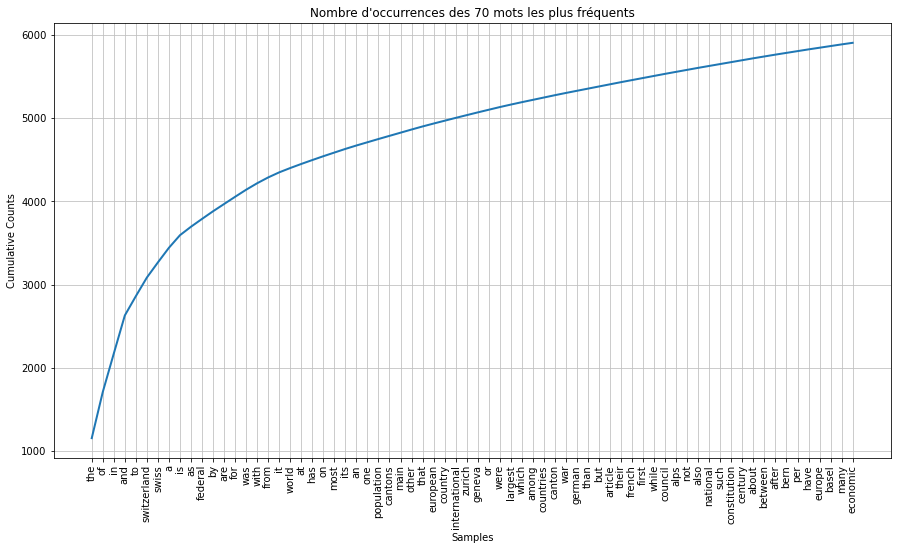

<AxesSubplot:title={'center':"Nombre d'occurrences des 70 mots les plus fréquents"}, xlabel='Samples', ylabel='Cumulative Counts'>

In [101]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
fdist.plot(70, cumulative=True, title="Nombre d'occurrences cumulatif des 70 mots les plus fréquents")

**8.** Veuillez construire une liste avec la longueur de chaque token du texte, créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (non-cumulative) des nombres d'occurrences pour chaque longueur.  Qu'observez-vous ?

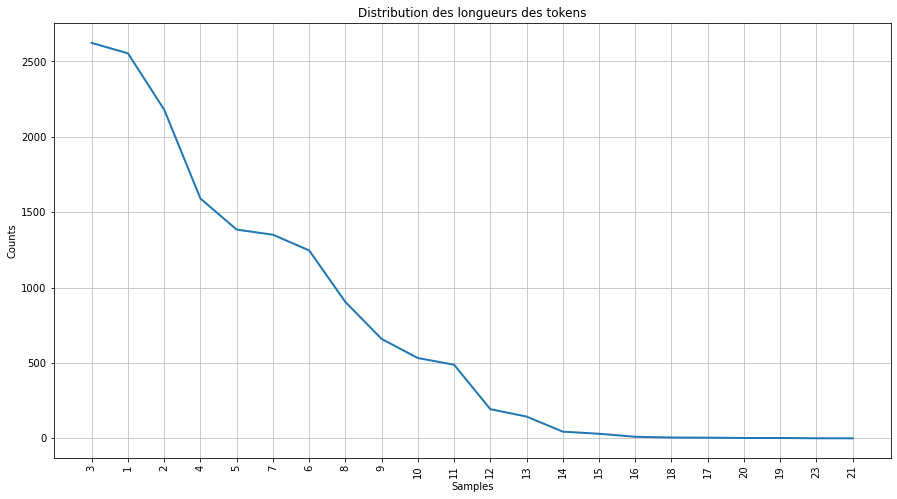

<AxesSubplot:title={'center':'Distribution des longueurs des tokens'}, xlabel='Samples', ylabel='Counts'>

In [105]:
# Veuillez écrire votre code ci-dessous, puis exécuter cette cellule.
tokensLength = [len(w) for w in words2]
freqDist = nltk.FreqDist(tokensLength)
plt.figure(figsize=(15, 8))
freqDist.plot(title="Distribution des longueurs des tokens")

In [ ]:
# Votre réponse à la question ici :
"""
La distribution des longueurs des mots dans ce texte suit un schéma assez logique. On voit que la plupart des mots ont entre 3 et 8 lettres, avec un pic vers 3-4 caractères. C'est plutôt normal vu qu'en anglais, on utilise beaucoup de petits mots comme "the", "of" ou "in" (stop words).
La courbe chute ensuite progressivement, ce qui montre que les mots plus longs sont moins fréquents. Après 15 caractères, on trouve très peu de mots, sûrement des termes techniques ou des mots composés.
C'est une distribution assez typique pour un texte en anglais.
"""

## Fin de la partie 1c du Labo1
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_ sous le nom `TAL_labo1c_NOM1_NOM2.ipynb`.  Ajoutez-le dans une archive _zip_ avec le _notebook_ 1b, et soumettez l'archive individuellement sur Cyberlearn. 